In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')

In [3]:
dict_x_train = train.ix[:,'0':]
pixel_train = dict_x_train.as_matrix()
dict_y_train = train.ix[:,'5']
label = dict_y_train.as_matrix()

dict_x_test = test.ix[:,'0':]
pixel_test = dict_x_test.as_matrix()
dict_y_test = test.ix[:,'7']
label_test = dict_y_test.as_matrix()

In [4]:
np.shape(pixel_test)

(9999, 784)

In [5]:
mean_train = np.mean(pixel_train,axis = 1)
std_train = np.std(pixel_train,axis = 1)

mean_test = np.mean(pixel_test,axis = 1)
std_test = np.std(pixel_test,axis = 1)

Pre-processing the data. np.tile create matrix with duplicated rows or columns

In [6]:
mean_temp_train = np.tile(mean_train,[784,1])
mean_temp_train = mean_temp_train.transpose()

std_temp_train = np.tile(std_train,[784,1])
std_temp_train = std_temp_train.transpose()


mean_temp_test = np.tile(mean_test,[784,1])
mean_temp_test = mean_temp_test.transpose()

std_temp_test = np.tile(std_test,[784,1])
std_temp_test = std_temp_test.transpose()

In [7]:
zero_mean_train = pixel_train - mean_temp_train
data = zero_mean_train/std_temp_train


zero_mean_test = pixel_test - mean_temp_test
test_data = zero_mean_test/std_temp_test

In [8]:
train_data = data

In [9]:
data = train_data[0:42000,:]
validate = train_data[42001:54000,:]
testdata = train_data[54001:59998,:]

label_data = label[0:42000]
label_validate = label[42001:54000]
label_test = label[54001:59998]

In [10]:
def one_hot_encoding(x):
    temp = np.zeros((len(x), 10))             #10 classes
    temp[np.arange(len(x)), x] = 1
    return temp

In [11]:
img_size = 28

img_size_flat = img_size * img_size

img_shape = (img_size, img_size)

num_classes = 10

In [12]:
x = tf.placeholder(tf.float32, [None, img_size_flat])
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_true_cls = tf.placeholder(tf.int64, [None])

In [13]:
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

In [14]:
logits = tf.matmul(x, weights) + biases

In [15]:
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)
y_pred

<tf.Tensor 'Softmax:0' shape=(?, 10) dtype=float32>

# L2 regularizations

In [16]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                        labels=y_true)
cost = tf.reduce_mean(cross_entropy+0*tf.nn.l2_loss(weights))

In [17]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.005).minimize(cost)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [18]:
def one_hot_encoding(x):
    temp = np.zeros((len(x), 10))             #10 classes
    temp[np.arange(len(x)), x] = 1
    return temp

In [19]:
session = tf.Session()
session.run(tf.global_variables_initializer())

In [20]:
batch_size = 100
steps = len(data)/batch_size
#steps = 800/batch_size
steps = int(steps)
err_test = list()
err_validate = list()
acc_test = list()
acc_validate = list()
def optimize(num_iterations):
    for i in range(num_iterations):
        k = 0
        for j in range(steps):
            x_batch = data[k:k+ batch_size,:] 
            y_true_batch = label_data[k:k+ batch_size]

            y_true_batch = one_hot_encoding(y_true_batch)
           
            k = k + batch_size
            feed_dict_train = {x: x_batch,
                               y_true: y_true_batch}
            session.run(optimizer, feed_dict=feed_dict_train)
        print("Time: {0}, acc on validate: {1}, acc on data: {2}".format(i, print_accuracy(feed_dict_test), print_accuracy(feed_dict_validate)))
        err_test.append(print_loss(feed_dict_test))
        err_validate.append(print_loss(feed_dict_validate))
        acc_validate.append(print_accuracy(feed_dict_validate))
        acc_test.append(print_accuracy(feed_dict_test))

In [21]:
feed_label_validate = one_hot_encoding(label_validate)
validate_class = np.array([label.argmax() for label in feed_label_validate])
feed_dict_validate = {x: validate,
                  y_true: feed_label_validate,
                  y_true_cls: validate_class}

In [22]:
feed_label_test = one_hot_encoding(label_data)
test_class = np.array([label.argmax() for label in feed_label_test])
feed_dict_test = {x: data,
                  y_true: feed_label_test,
                  y_true_cls: test_class}

In [23]:
def print_accuracy(feed_dict_):
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict_)
    
    # Print the accuracy.
    #print("Accuracy on test-set: {0:.1%}".format(acc))
    return acc

In [24]:
def print_loss(feed_dict_):
    # Use TensorFlow to compute the accuracy.
    acc = session.run(cost, feed_dict_)
    
    # Print the accuracy.
    #print("Accuracy on test-set: {0:.1%}".format(acc))
    return acc

In [25]:
err_validate.append(print_loss(feed_dict_validate))
err_test.append(print_loss(feed_dict_test))


acc_validate.append(print_accuracy(feed_dict_validate))
acc_test.append(print_accuracy(feed_dict_test))

In [26]:
print_accuracy(feed_dict_validate)

0.099424951

In [27]:
optimize(num_iterations=100)

Time: 0, acc on validate: 0.8784762024879456, acc on data: 0.8694891333580017
Time: 1, acc on validate: 0.8915476202964783, acc on data: 0.8815734386444092
Time: 2, acc on validate: 0.8982856869697571, acc on data: 0.8873239159584045
Time: 3, acc on validate: 0.9015476107597351, acc on data: 0.8914076089859009
Time: 4, acc on validate: 0.9049285650253296, acc on data: 0.8945745229721069
Time: 5, acc on validate: 0.9072142839431763, acc on data: 0.8971580862998962
Time: 6, acc on validate: 0.9091190695762634, acc on data: 0.89882493019104
Time: 7, acc on validate: 0.9109047651290894, acc on data: 0.9011584520339966
Time: 8, acc on validate: 0.9121666550636292, acc on data: 0.9019085168838501
Time: 9, acc on validate: 0.913261890411377, acc on data: 0.9029918909072876
Time: 10, acc on validate: 0.9140475988388062, acc on data: 0.9035753011703491
Time: 11, acc on validate: 0.9148809313774109, acc on data: 0.9039086699485779
Time: 12, acc on validate: 0.9156190752983093, acc on data: 0.904

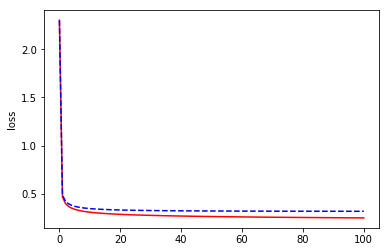

In [28]:
fig = plt.figure()
plt.plot(range(len(err_test)),err_test,'r')
plt.plot(range(len(err_validate)),err_validate,'b--')
plt.ylabel('loss')
#plt.title('accuracy on validate data')
plt.show()
fig.savefig('loss_alpha0005.png')

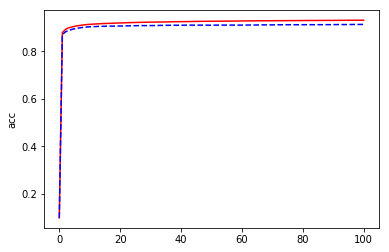

In [29]:
fig = plt.figure()
plt.plot(range(len(acc_test)),acc_test,'r')
plt.plot(range(len(acc_validate)),acc_validate,'b--')
plt.ylabel('acc')
#plt.title('accuracy on validate data')
plt.show()
fig.savefig('acc_alpha0005.png')

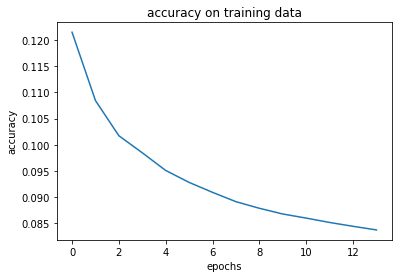

In [38]:
plt.plot(range(len(acc_test)),acc_test)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title('accuracy on training data')
plt.show()

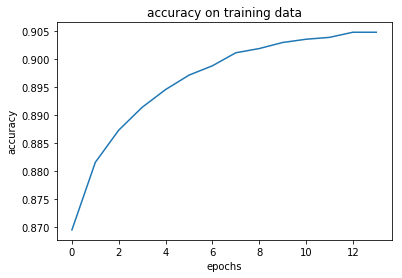

In [39]:
plt.plot(range(len(acc_validate)),acc_validate)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title('accuracy on training data')
plt.show()